In [2]:
#importing required libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

In [3]:
#This code reads in a set of images of a specific celebrity, Kane Williamson, and resizes them to the specified shape of (200,200)
kane_images = []
kane_labels = []
shape = (200,200)  
train_path = '../input/sport-celebrity-image-classification/Sports-celebrity images/Kane Williamson'

for filename in os.listdir('../input/sport-celebrity-image-classification/Sports-celebrity images/Kane Williamson'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
        kane_labels.append(filename.split('_')[0])
        
        img = cv2.resize(img,shape)
        
        kane_images.append(img)

kane_images = np.array(kane_images)

In [4]:
kane_images.shape

(119, 200, 200, 3)

In [5]:
#This code reads in a set of images of a specific celebrity, and resizes them to the specified shape of (200,200)
rona_images = []       
rona_labels = []
shape = (200,200)  
train_path = '../input/sport-celebrity-image-classification/Sports-celebrity images/Ronaldo'

for filename in os.listdir('../input/sport-celebrity-image-classification/Sports-celebrity images/Ronaldo'):
    if filename.split('.')[1] == 'jpg':
        img= cv2.imread(os.path.join(train_path,filename))
        rona_labels.append(filename.split('_')[0])
        img = cv2.resize(img,shape)
        rona_images.append(img)

rona_images = np.array(rona_images)

In [6]:
rona_images.shape

(109, 200, 200, 3)

In [7]:
##This code reads in a set of images of a specific celebrity, and resizes them to the specified shape of (200,200)
maria_images = []       
maria_labels = []
shape = (200,200)  
train_path = '../input/sport-celebrity-image-classification/Sports-celebrity images/Maria Sharapova'

for filename in os.listdir('../input/sport-celebrity-image-classification/Sports-celebrity images/Maria Sharapova'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        maria_labels.append(filename.split('_')[0])
        img = cv2.resize(img,shape)
        maria_images.append(img)

maria_images = np.array(maria_images)

In [8]:
maria_images.shape

(103, 200, 200, 3)

In [9]:
#This code reads in a set of images of a specific celebrity, and resizes them to the specified shape of (200,200)
kobe_images = []       
kobe_labels = []
shape = (200,200)  
train_path = '../input/sport-celebrity-image-classification/Sports-celebrity images/Kobe Bryant'

for filename in os.listdir('../input/sport-celebrity-image-classification/Sports-celebrity images/Kobe Bryant'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        kobe_labels.append(filename.split('_')[0])
        img = cv2.resize(img,shape)
        kobe_images.append(img)

kobe_images = np.array(kobe_images)

In [10]:
kobe_images.shape

(110, 200, 200, 3)

In [11]:
#combine all lables and images
all_labels=np.concatenate([kane_labels, rona_labels, maria_labels,kobe_labels])
all_images=np.concatenate([kane_images, rona_images, maria_images,kobe_images])

Sharapova


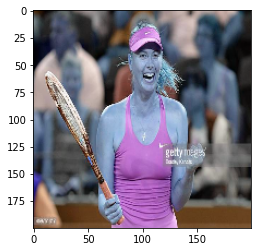

In [12]:
print(all_labels[300])
plt.imshow(all_images[300])

In [13]:
all_images.shape

(441, 200, 200, 3)

In [14]:
all_labels.shape

(441,)

In [15]:
#reshape the all images
all_images=np.reshape(all_images,(441,-1))

In [16]:
#make dataframe 
all_images=pd.DataFrame(all_images)

In [17]:
all_images

,0,1,2,3,4,5,6,7,8,9,...,119990,119991,119992,119993,119994,119995,119996,119997,119998,119999
0,238,250,253,238,250,253,238,250,254,238,...,127,78,140,113,75,141,112,82,143,114
1,79,81,81,80,82,82,81,82,82,80,...,82,88,83,82,88,83,82,86,81,78
2,4,4,4,4,4,4,4,4,4,4,...,55,32,32,38,10,10,15,2,2,2
3,74,30,17,74,30,17,74,30,17,75,...,4,0,0,0,1,1,1,3,1,0
4,255,255,255,255,255,255,255,255,255,255,...,49,13,55,48,12,54,47,14,55,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,2,2,2,2,2,2,2,2,2,1,...,3,3,3,3,3,3,3,4,4,4
437,23,18,147,26,23,147,26,24,143,21,...,217,178,202,219,175,200,216,174,201,211
438,10,36,102,13,34,98,17,36,92,17,...,100,53,67,88,53,68,83,52,66,80
439,5,5,11,6,5,14,10,9,20,20,...,55,21,19,56,14,18,44,12,21,41


In [18]:
#this code add target colomn into data frame
all_images['target']=all_labels

In [19]:
all_images

,0,1,2,3,4,5,6,7,8,9,...,119991,119992,119993,119994,119995,119996,119997,119998,119999,target
0,238,250,253,238,250,253,238,250,254,238,...,78,140,113,75,141,112,82,143,114,kane
1,79,81,81,80,82,82,81,82,82,80,...,88,83,82,88,83,82,86,81,78,kane
2,4,4,4,4,4,4,4,4,4,4,...,32,32,38,10,10,15,2,2,2,kane
3,74,30,17,74,30,17,74,30,17,75,...,0,0,0,1,1,1,3,1,0,kane
4,255,255,255,255,255,255,255,255,255,255,...,13,55,48,12,54,47,14,55,48,kane
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,2,2,2,2,2,2,2,2,2,1,...,3,3,3,3,3,3,4,4,4,kobe
437,23,18,147,26,23,147,26,24,143,21,...,178,202,219,175,200,216,174,201,211,kobe
438,10,36,102,13,34,98,17,36,92,17,...,53,67,88,53,68,83,52,66,80,kobe
439,5,5,11,6,5,14,10,9,20,20,...,21,19,56,14,18,44,12,21,41,kobe


In [20]:
X=all_images.drop('target',axis=1)
y=all_images['target']

In [21]:
y=pd.DataFrame(y)

In [22]:

y=pd.get_dummies(y)

In [23]:
y

,target_Sharapova,target_kane,target_kobe,target_ronaldo
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
436,0,0,1,0
437,0,0,1,0
438,0,0,1,0
439,0,0,1,0


In [24]:
#splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
X_train=X_train.to_numpy()
X_train = np.reshape(X_train, (308,200,200,3))

In [26]:
X_test=X_test.to_numpy()
X_test=np.reshape(X_test,(133,200,200,3))

In [27]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [28]:
x_train,x_val,y_train,y_val = train_test_split(X_train,y_train,random_state=1)

In [29]:
#convolutional neural network (CNN) model for image classification
model= Sequential()
#first layer is a 2D convolutional layer with a filter size of 32 and a kernel size of (3,3). 
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
# second layer is another 2D convolutional layer with a filter size of 30 and a kernel size of (3,3). The activation function used is also 'tanh'.
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
# third layer is a max pooling layer with a pool size of (2,2).
model.add(MaxPool2D(2,2))
# fourth layer is another 2D convolutional layer with a filter size of 30 and a kernel size of (3,3). The activation function used is still 'tanh'.
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
# fifth layer is another max pooling layer with a pool size of (2,2).
model.add(MaxPool2D(2,2))
#sixth layer is another 2D convolutional layer with a filter size of 30 and a kernel size of (3,3). The activation function used is still 'tanh'.
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
#seventh layer is a flatten layer that flattens the output from the previous layer into a 1D array.
model.add(Flatten())
#eighth layer is a fully connected layer with 20 neurons and a ReLU activation function.
model.add(Dense(20,activation='relu'))
#ninth layer is another fully connected layer with 15 neurons and a ReLU activation function.
model.add(Dense(15,activation='relu'))
#final layer is a fully connected layer with 4 neurons and a softmax activation function.
model.add(Dense(4,activation = 'softmax'))
#model is compiled with a categorical crossentropy loss function, accuracy as a metric, and the Adam optimizer.   
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten (Flatten)            (None, 63480)             0

In [31]:
#This code trains the model on the training data (x_train, y_train) for 50 epochs with a batch size of 50.
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
5/5 [==============================] - 10s 2s/step - loss: 5.8288 - acc: 0.2944 - val_loss: 11.3072 - val_acc: 0.2468
Epoch 2/50
5/5 [==============================] - 9s 2s/step - loss: 5.6314 - acc: 0.2857 - val_loss: 4.6928 - val_acc: 0.2208
Epoch 3/50
5/5 [==============================] - 9s 2s/step - loss: 2.4676 - acc: 0.3160 - val_loss: 1.8231 - val_acc: 0.2987
Epoch 4/50
5/5 [==============================] - 9s 2s/step - loss: 1.7402 - acc: 0.3550 - val_loss: 1.4015 - val_acc: 0.3636
Epoch 5/50
5/5 [==============================] - 9s 2s/step - loss: 1.2159 - acc: 0.4242 - val_loss: 1.6686 - val_acc: 0.2727
Epoch 6/50
5/5 [==============================] - 9s 2s/step - loss: 1.2339 - acc: 0.4459 - val_loss: 1.2403 - val_acc: 0.3766
Epoch 7/50
5/5 [==============================] - 9s 2s/step - loss: 1.1432 - acc: 0.5498 - val_loss: 1.2823 - val_acc: 0.4026
Epoch 8/50
5/5 [==============================] - 9s 2s/step - loss: 0.9942 - acc: 0.6017 - val_loss: 1.3106 

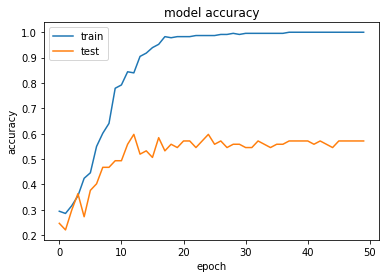

In [32]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

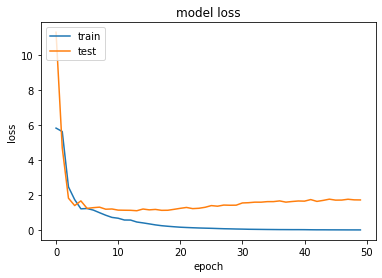

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

3/3 [==============================] - 1s 212ms/step - loss: 1.7230 - acc: 0.5714
[1.7229970693588257, 0.5714285969734192]
